In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_dis_df = pd.read_csv('../impacts_research_data/ACSST1Y2023.S1810-2024-10-18T052457.csv')

In [3]:
for col_name in raw_dis_df.columns:
    raw_dis_df[col_name] = raw_dis_df[col_name].str.strip()

In [4]:
only_dis_df = raw_dis_df.iloc[22:, [0, 3, 4, 5, 6]].reset_index(drop=True)

### Cleaning

In [5]:
def clean_int(input_str):
    return int("".join(input_str.split(',')))

def clean_percent(input_str):
    return int("".join(input_str[0:-1].split('.')))/10.0

def clean_percent_moe(input_str):
    return int("".join(input_str[1:].split('.')))/10.0

def clean_moe(input_str):
    return clean_int(input_str[1:])

In [6]:
only_dis_df.head(5)

,Label (Grouping),"Imperial County, California!!With a disability!!Estimate","Imperial County, California!!With a disability!!Margin of Error","Imperial County, California!!Percent with a disability!!Estimate","Imperial County, California!!Percent with a disability!!Margin of Error"
0,With a hearing difficulty,"7,001","±1,251",4.0%,±0.7
1,Population under 18 years,497,±482,1.0%,±1.0
2,Population under 5 years,157,±216,1.3%,±1.8
3,Population 5 to 17 years,340,±348,0.9%,±0.9
4,Population 18 to 64 years,"1,711",±736,1.7%,±0.7


In [7]:
for col_name in only_dis_df.columns[1:]:
    if 'Percent' in col_name:
        if 'Estimate' in col_name:
            only_dis_df[col_name] = only_dis_df[col_name].apply(clean_percent)
        else: # percent moe
            only_dis_df[col_name] = only_dis_df[col_name].apply(clean_percent_moe)
    elif 'Estimate' in col_name: # int
        only_dis_df[col_name] = only_dis_df[col_name].apply(clean_int)
    else: # moe
        only_dis_df[col_name] = only_dis_df[col_name].apply(clean_moe)


In [9]:
cleaned_dis = only_dis_df.copy(deep=True)

In [10]:
# getting just the rows with the aggregate information
groups_dct = {}
for group in only_dis_df['Label (Grouping)']:
    if 'with' in group.lower() and 'difficulty' in group.lower():
        groups_dct[group] = only_dis_df[only_dis_df['Label (Grouping)'].eq(group)]

In [35]:
dis_num = {}
for row in list(groups_dct.keys()):
    type = " ".join(groups_dct[row].iloc[0, 0].split(" ")[2:][:-1])
    num_affected = groups_dct[row].iloc[0, 1]
    dis_num[type] = num_affected

In [36]:
plt.style.use('fivethirtyeight')

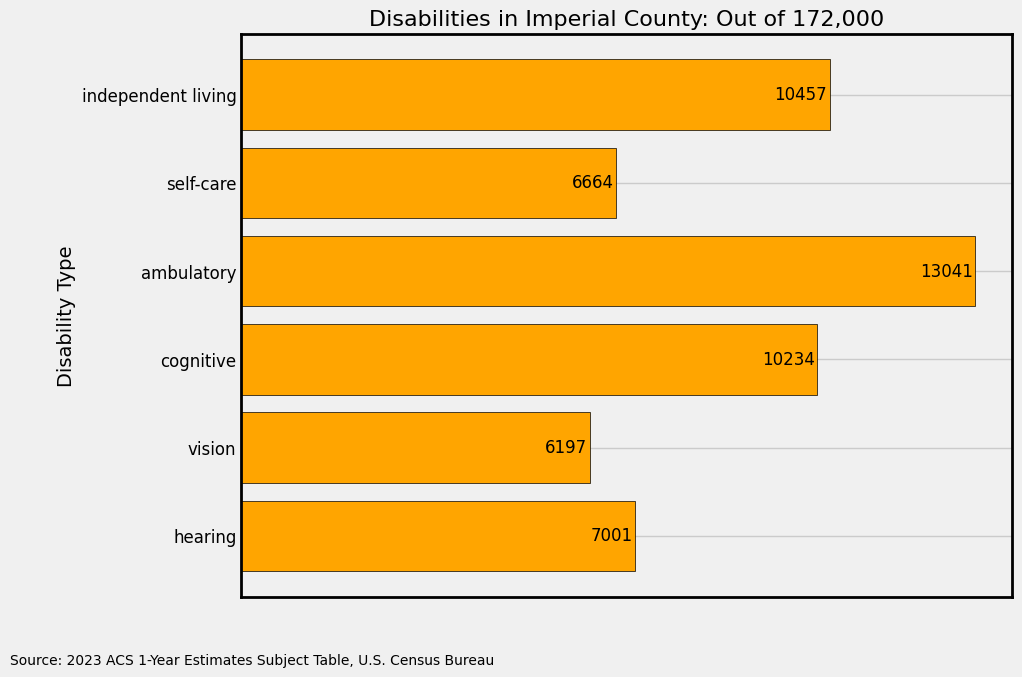

In [72]:
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(11, 7))

disability_groups = list(dis_num.keys())
group_counts = [dis_num[type] for type in disability_groups]

bars = ax.barh(disability_groups, group_counts, color='orange', edgecolor='black')

for bar in bars:
    width = bar.get_width()  
    ax.text(width - 50,  
            bar.get_y() + bar.get_height() / 2,  
            f'{int(width)}',  
            va='center',  
            ha='right',  
            fontsize=12, color='black')  

plt.title('Disabilities in Imperial County: Out of 172,000', fontsize=16)
plt.ylabel('Disability Type', fontsize=14)

ax.set_xticks([])
ax.tick_params(axis='y', labelsize=12)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.text(-0.3, -0.1, 'Source: 2023 ACS 1-Year Estimates Subject Table, U.S. Census Bureau', 
         transform=ax.transAxes, fontsize=10, va='top', ha='left')

plt.tight_layout()
plt.show()